In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
N_number = 123

In [2]:
dataframe = pd.read_csv('anime cleaned.csv', index_col=[0])
dataframe.head()

/var/folders/ts/xc6_h0kd5nv7gws_x4n04jwr0000gn/T/ipykernel_5781/2655601491.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('anime cleaned.csv', index_col=[0])


,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,...,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
MAL_ID,,,,,,,,,,,,,,,,,,,,,
1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",1998.0,Bandai Visual,...,0,1,0,0,0,0,0,0,0,1
5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,"Sunrise, Bandai Visual",...,0,1,0,0,0,0,1,0,0,0
6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",1998.0,Victor Entertainment,...,1,0,0,0,0,0,0,0,0,1
7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",2002.0,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...",...,1,0,0,0,0,0,0,0,0,1
8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",2004.0,"TV Tokyo, Dentsu",...,0,0,0,0,0,0,0,1,0,0


In [3]:
#row-wise missing value removal
classification_df = dataframe[['Score','Members','Favorites','Watching','Completed','On-Hold','Dropped','Plan to Watch']].dropna()

In [4]:
#Reviewers' reaction to the movie
feature_list = ['Members','Favorites','Watching','Completed','On-Hold','Dropped','Plan to Watch']
X = classification_df[feature_list].to_numpy()

In [5]:
#We apply the PCA of 2 components to do dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_standardized = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_standardized)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.75858745 0.09939764]
[256.82076101  92.96411537]


In [6]:
#We define Y label to be good quality movie or bad quality movie
Y = classification_df['Score']>=classification_df['Score'].median()
Y = Y.to_numpy()

Text(0.5, 1.0, 'PCA (2PCs) for Dataset')

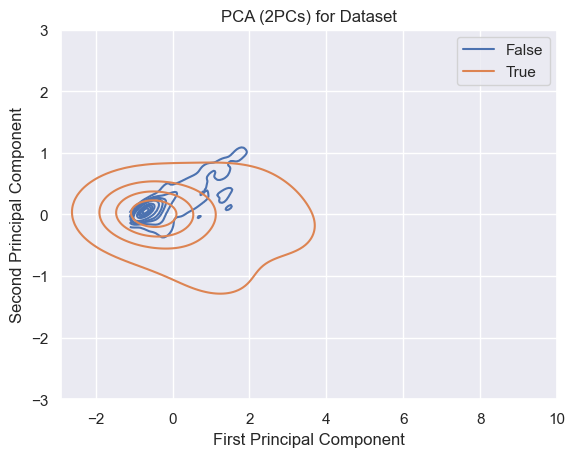

In [7]:
#Get the density plot of the data
sns.kdeplot(x=X_reduced[:,0],y=X_reduced[:,1],clip = ((-20,10),(-3,3)), hue = Y.squeeze())
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA (2PCs) for Dataset')

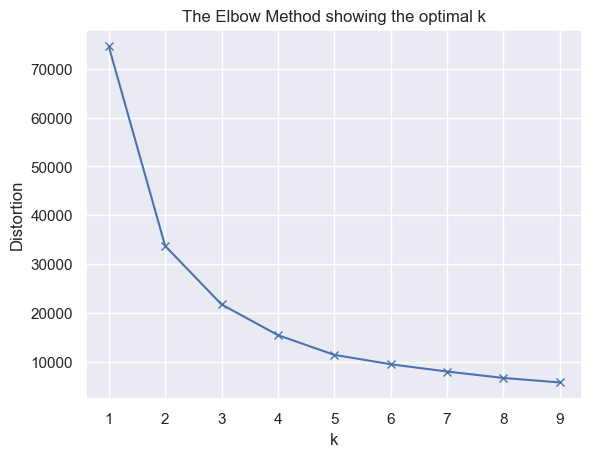

In [8]:
#Use elbow method to find optimal k for Kmeans
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_reduced)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
#fit the k = 2 Kmeans model
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X_reduced)
kmeanModel.cluster_centers_

array([[11.12787782, -0.56234906],
       [-0.29521064,  0.01491852]])

Text(0.5, 1.0, 'PCA (2PCs) for Dataset')

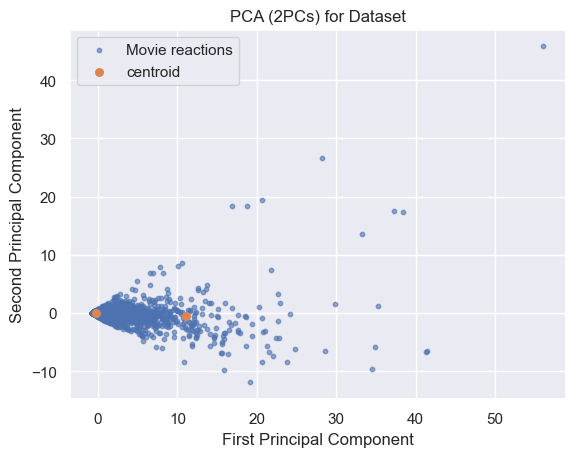

In [10]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],alpha = 0.6,label = 'Movie reactions', s = 10)
plt.scatter(kmeanModel.cluster_centers_[:,0],kmeanModel.cluster_centers_[:,1], s = 30,label = 'centroid')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('PCA (2PCs) for Dataset')

In [11]:
# We do a train test split
from sklearn.model_selection import train_test_split

#Random train test split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size=0.2, random_state=N_number)

In [12]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
baseline_f1 = f1_score(y_test,np.ones_like(y_test))
print(baseline_f1)

0.6668454935622318


The AUC is: 0.86, the f1_score is 0.67


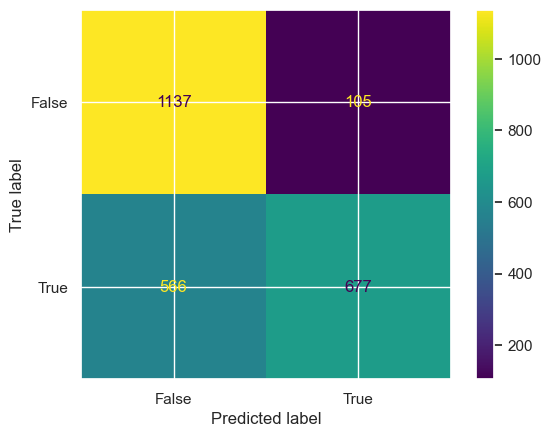

In [13]:
# Here we try the logistic regression model to fit the score label
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#initialize the model
clf = LogisticRegressionCV(Cs = 20, solver='liblinear')

#fit
clf.fit(X_train,y_train)

#predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

#metric
auc_score = roc_auc_score(y_test, y_prob[:,1])
f1score = f1_score(y_test,y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
print(f'The AUC is: {auc_score:.2f}, the f1_score is {f1score:.2f}')

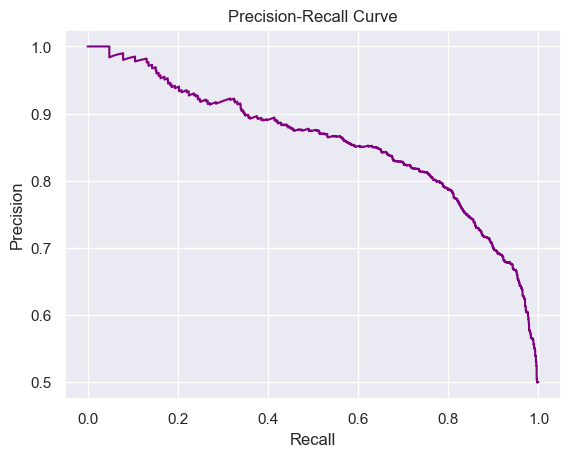

In [14]:
from sklearn.metrics import precision_recall_curve
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob[:,1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

The AUC is: 0.87, the f1_score is 0.73


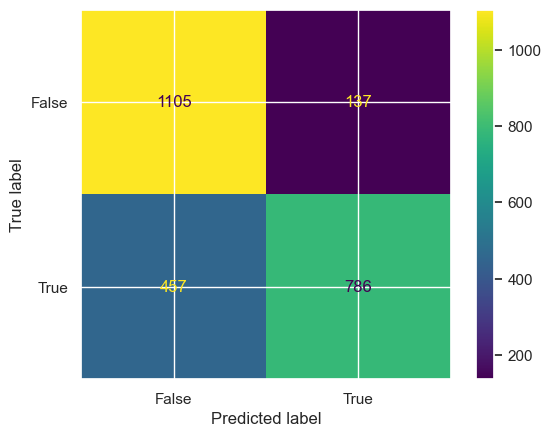

In [15]:
#Here we apply the SVM to fit the target label
from sklearn import svm

#initialize the model
clf = svm.SVC(probability=True)

#fit
clf.fit(X_train,y_train)

#predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

#metric
auc_score = roc_auc_score(y_test, y_prob[:,1])
f1score = f1_score(y_test,y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
print(f'The AUC is: {auc_score:.2f}, the f1_score is {f1score:.2f}')

In [16]:
# We will use the whole dataset for the following models, cuz they will be regularized in other ways to prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=N_number)

The AUC is: 0.88, the f1_score is 0.81


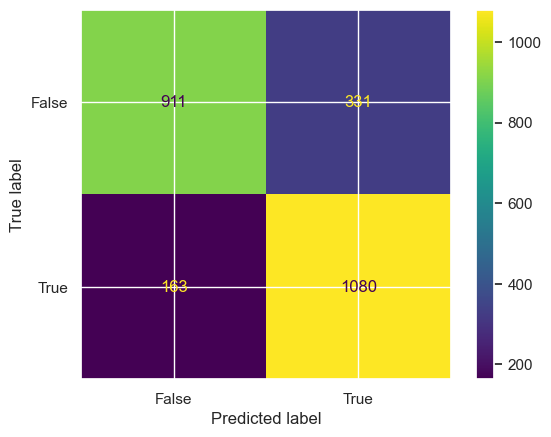

In [17]:
#Here we apply the random forest classifier to fit the target label
from sklearn.tree import DecisionTreeClassifier

#initialize the model
clf = DecisionTreeClassifier(random_state= N_number, max_depth=3)

#fit
clf.fit(X_train,y_train)

#predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

#metric
auc_score = roc_auc_score(y_test, y_prob[:,1])
f1score = f1_score(y_test,y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
print(f'The AUC is: {auc_score:.2f}, the f1_score is {f1score:.2f}')

In [18]:
from sklearn import tree
sns.reset_orig()
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,feature_names=feature_list, class_names=['False','True'],filled= True)

In [19]:
#Here we apply the random forest classifier to fit the target label
from sklearn.ensemble import RandomForestClassifier

#initialize the model
clf = RandomForestClassifier(random_state=N_number)

#fit
clf.fit(X_train,y_train)

#predict
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

#metric
auc_score = roc_auc_score(y_test, y_prob[:,1])
f1score = f1_score(y_test,y_pred)
confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_, display_labels = [False, True])
cm_display.plot()
print(f'The AUC is: {auc_score:.2f}, the f1_score is {f1score:.2f}')

The AUC is: 0.93, the f1_score is 0.85


In [20]:
clf.feature_importances_

array([0.19791279, 0.19554662, 0.10469835, 0.15705786, 0.10774163,
       0.1140557 , 0.12298706])